In [1]:
# Cell 1 — Create project folders (works in both Jupyter & Colab)

import os
from pathlib import Path

# Detect if running in Google Colab or local Jupyter Notebook
if os.path.exists("/content"):
    BASE_DIR = Path("/content") / "smart_parking"
else:
    BASE_DIR = Path.cwd() / "smart_parking"

# Define project folder paths
DATASET_DIR = BASE_DIR / "dataset"
SLOTS_DIR   = DATASET_DIR / "slots"
MODELS_DIR  = BASE_DIR / "models"
OUTPUTS_DIR = BASE_DIR / "outputs"

# Create all required directories
for folder in [BASE_DIR, DATASET_DIR, SLOTS_DIR, MODELS_DIR, OUTPUTS_DIR]:
    folder.mkdir(parents=True, exist_ok=True)

print("✅ Project structure created successfully!")
print("Base directory:", BASE_DIR.resolve())
print("Dataset folder:", DATASET_DIR)
print("Slots folder:  ", SLOTS_DIR)
print("Models folder: ", MODELS_DIR)
print("Outputs folder:", OUTPUTS_DIR)


✅ Project structure created successfully!
Base directory: /workspace/smart_parking
Dataset folder: /workspace/smart_parking/dataset
Slots folder:   /workspace/smart_parking/dataset/slots
Models folder:  /workspace/smart_parking/models
Outputs folder: /workspace/smart_parking/outputs


In [2]:
# Cell 2 — Install required packages (only if needed)

import sys
import subprocess
import pkgutil

def install_if_missing(package):
    if pkgutil.find_loader(package) is None:
        print(f"📦 Installing {package} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    else:
        print(f"✔ {package} already installed")

# Essential packages
packages = ["opencv-python", "tqdm", "tensorflow", "matplotlib"]

for pkg in packages:
    install_if_missing(pkg)

print("✅ All required packages are installed!")


📦 Installing opencv-python ...


/tmp/ipykernel_588/1979001221.py:8: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if pkgutil.find_loader(package) is None:


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 29.8 MB/s  0:00:02m0:00:0100:01
📦 Installing tqdm ...
📦 Installing tensorflow ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 24.9 MB/s  0:00:18m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 8.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.4 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 15.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 16.8 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25/25 [tensorflow]5 [tensorflow]]data-server]
📦 Installing matplotlib ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.3 

In [3]:
# Cell 3 — Clean Imports

import os
from pathlib import Path
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from tqdm import tqdm
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

print("✅ Imports loaded successfully!")


2025-11-17 18:55:21.840175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ Imports loaded successfully!


In [4]:
# Cell 4 — Download PKLot dataset if not already present

import os
import urllib.request
import tarfile

PKLOT_URL = "http://www.inf.ufpr.br/lesoliveira/download/PKLot.tar.gz"
PKLOT_ARCHIVE = BASE_DIR / "PKLot.tar.gz"
PKLOT_DIR = BASE_DIR / "PKLot"

if PKLOT_DIR.exists():
    print("✅ PKLot dataset already exists at:", PKLOT_DIR)
else:
    # If archive doesn't exist, download it
    if not PKLOT_ARCHIVE.exists():
        print("⬇️ Downloading PKLot dataset (1.8GB)...")
        urllib.request.urlretrieve(PKLOT_URL, PKLOT_ARCHIVE)
        print("📦 Download complete!")

    # Extract the dataset
    print("📂 Extracting PKLot dataset... (this may take several minutes)")
    with tarfile.open(PKLOT_ARCHIVE, "r:gz") as tar:
        tar.extractall(BASE_DIR)

    # The extracted folder is usually PKLot-master → rename it
    extracted_path = BASE_DIR / "PKLot-master"
    if extracted_path.exists():
        extracted_path.rename(PKLOT_DIR)

    print("✅ PKLot dataset extracted to:", PKLOT_DIR)


⬇️ Downloading PKLot dataset (1.8GB)...
📦 Download complete!
📂 Extracting PKLot dataset... (this may take several minutes)
✅ PKLot dataset extracted to: /workspace/smart_parking/PKLot


In [5]:
# Cell 5 — Verify PKLot Dataset Structure

from pathlib import Path

# PKLot directory detected in previous cell
PKLOT_DIR = BASE_DIR / "PKLot"

# Check existence
if not PKLOT_DIR.exists():
    raise FileNotFoundError(f"❌ PKLot directory not found at {PKLOT_DIR}. Please download/extract it first.")

print("📂 PKLot root directory:", PKLOT_DIR)

# List parking areas (e.g., parking1a, parking1b, parking2)
parking_areas = sorted([p for p in PKLOT_DIR.iterdir() if p.is_dir()])

print("\n🚗 Parking Areas Found:")
for area in parking_areas:
    print(" -", area.name)

# For each parking area, list weather conditions
print("\n🌤 Weather Conditions per Area:")
for area in parking_areas:
    weather_dirs = sorted([w for w in area.iterdir() if w.is_dir()])
    print(f"\n{area.name}:")
    for w in weather_dirs:
        print("   -", w.name)

# Quick sanity check: Count some XML files
sample_xml_files = list(PKLOT_DIR.rglob("*.xml"))

print(f"\n🔎 Total XML annotation files found: {len(sample_xml_files)}")
print(f"🖼 Sample file: {sample_xml_files[0] if sample_xml_files else 'None'}")

if len(sample_xml_files) == 0:
    print("❌ No XML files detected. Dataset may be corrupted.")
else:
    print("✅ PKLot dataset appears valid!")


📂 PKLot root directory: /workspace/smart_parking/PKLot

🚗 Parking Areas Found:
 - parking1a
 - parking1b
 - parking2

🌤 Weather Conditions per Area:

parking1a:
   - cloudy
   - rainy
   - sunny

parking1b:
   - cloudy
   - rainy
   - sunny

parking2:
   - cloudy
   - rainy
   - sunny

🔎 Total XML annotation files found: 12416
🖼 Sample file: /workspace/smart_parking/PKLot/parking1b/rainy/2013-02-26/2013-02-26_13_19_33.xml
✅ PKLot dataset appears valid!


In [6]:
# Cell 6 — Extract parking slot crops from PKLot XML files

import cv2
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Define output slot directories
EMPTY_DIR = SLOTS_DIR / "empty"
OCC_DIR   = SLOTS_DIR / "occupied"

EMPTY_DIR.mkdir(parents=True, exist_ok=True)
OCC_DIR.mkdir(parents=True, exist_ok=True)

def parse_occupied_attribute(space):
    """
    PKLot uses multiple formats:
    - occupied="0" or "1"
    - occupied="false"/"true"
    - occupied="0"/"1" as string
    """
    occ = space.get("occupied")

    if occ is None:
        return None

    occ = occ.strip().lower()

    if occ in ["1", "true", "occupied"]:
        return 1
    elif occ in ["0", "false", "empty"]:
        return 0
    else:
        return None


def extract_slots_from_xml(image_path, xml_path):
    """Extract slot crops from one PKLot image using its XML file."""
    img = cv2.imread(str(image_path))
    if img is None:
        return

    H, W = img.shape[:2]

    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Iterate over all parking slots for this image
    for space in root.findall("space"):

        # Determine occupied / empty label
        occupied = parse_occupied_attribute(space)
        if occupied is None:
            continue

        # Extract polygon contour points
        contour = space.find("contour")
        if contour is None:
            continue

        xs, ys = [], []
        for pt in contour.findall("point"):
            xs.append(int(pt.get("x")))
            ys.append(int(pt.get("y")))

        if len(xs) == 0:
            continue

        # Convert polygon → bounding box and clamp within image
        xmin, xmax = max(0, min(xs)), min(W, max(xs))
        ymin, ymax = max(0, min(ys)), min(H, max(ys))

        crop = img[ymin:ymax, xmin:xmax]

        if crop.size == 0:  # Safety check
            continue

        # Save crop
        basename = image_path.stem
        slot_id = space.get("id", "slot")
        filename = f"{basename}_slot{slot_id}.jpg"

        if occupied == 1:
            out_path = OCC_DIR / filename
        else:
            out_path = EMPTY_DIR / filename

        cv2.imwrite(str(out_path), crop)


# --------- RUN EXTRACTION ---------

print("🚀 Starting PKLot slot extraction...")
areas = [p for p in PKLOT_DIR.iterdir() if p.is_dir()]

for area in areas:
    weathers = [w for w in area.iterdir() if w.is_dir()]

    for weather in weathers:
        print(f"\n📸 Processing {area.name} / {weather.name}")

        day_folders = [d for d in weather.iterdir() if d.is_dir()]

        for day in day_folders:
            xml_files = sorted(day.glob("*.xml"))

            for xml_path in tqdm(xml_files, desc=f"{day.name}"):
                img_path = xml_path.with_suffix(".jpg")
                if img_path.exists():
                    extract_slots_from_xml(img_path, xml_path)

print("✅ Slot extraction complete!")


🚀 Starting PKLot slot extraction...

📸 Processing parking1b / rainy


2013-03-05: 100%|██████████| 34/34 [00:07<00:00,  4.62it/s]



📸 Processing parking1b / cloudy


2013-03-14: 100%|██████████| 147/147 [00:30<00:00,  4.75it/s]



📸 Processing parking1b / sunny


2013-03-18: 100%|██████████| 93/93 [00:20<00:00,  4.60it/s]



📸 Processing parking1a / rainy


2012-12-28: 100%|██████████| 18/18 [00:00<00:00, 63.94it/s]



📸 Processing parking1a / sunny


2012-12-17: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]



📸 Processing parking1a / cloudy


2012-12-29: 100%|██████████| 102/102 [00:01<00:00, 63.21it/s]



📸 Processing parking2 / cloudy


2012-09-12: 100%|██████████| 51/51 [00:23<00:00,  2.15it/s]



📸 Processing parking2 / rainy


2012-10-23: 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]



📸 Processing parking2 / sunny


2012-09-17: 100%|██████████| 147/147 [01:10<00:00,  2.08it/s]

✅ Slot extraction complete!


📊 Slot Dataset Summary
-------------------------
Empty slots:     350349
Occupied slots:  335735
Total slots:     686084
✅ Both classes contain images.

🖼 Displaying sample EMPTY slots:


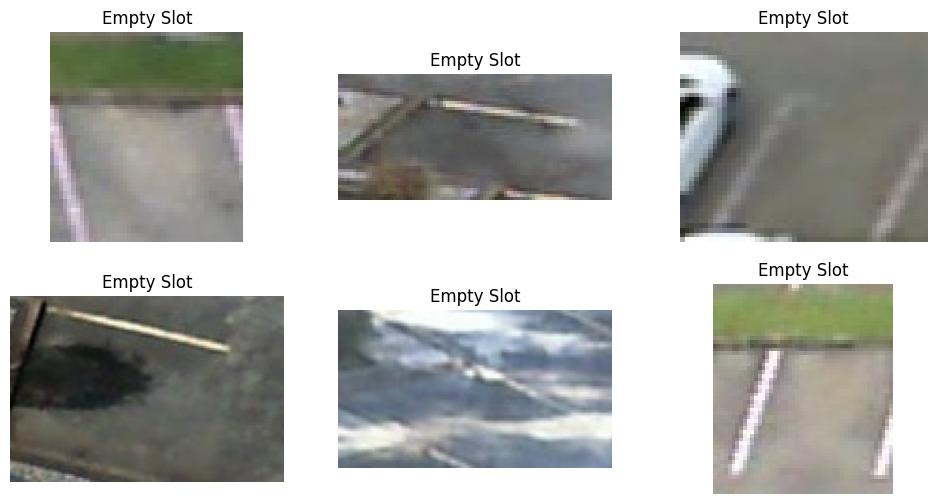


🖼 Displaying sample OCCUPIED slots:


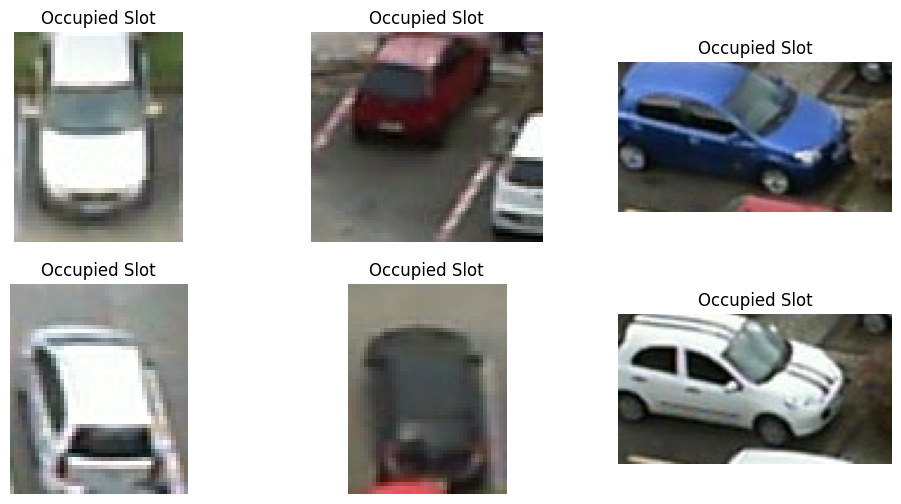

In [7]:
# Cell 7 — Verify extracted slot dataset

import random
import cv2
import matplotlib.pyplot as plt

EMPTY_DIR = SLOTS_DIR / "empty"
OCC_DIR   = SLOTS_DIR / "occupied"

# Count images
empty_slots = list(EMPTY_DIR.glob("*.jpg"))
occupied_slots = list(OCC_DIR.glob("*.jpg"))

print("📊 Slot Dataset Summary")
print("-------------------------")
print(f"Empty slots:     {len(empty_slots)}")
print(f"Occupied slots:  {len(occupied_slots)}")
print(f"Total slots:     {len(empty_slots) + len(occupied_slots)}")

# Basic validation
if len(empty_slots) == 0 or len(occupied_slots) == 0:
    print("❌ ERROR: Missing images in one or both classes.")
else:
    print("✅ Both classes contain images.")

# Show a few random sample crops
def show_random_samples(img_paths, title):
    samples = random.sample(img_paths, min(6, len(img_paths)))
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(samples):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

print("\n🖼 Displaying sample EMPTY slots:")
if len(empty_slots) > 0:
    show_random_samples(empty_slots, "Empty Slot")

print("\n🖼 Displaying sample OCCUPIED slots:")
if len(occupied_slots) > 0:
    show_random_samples(occupied_slots, "Occupied Slot")


In [8]:
# Cell 8 — Create training and validation data generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation + Normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,     # 20% validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Training subset
train_data = datagen.flow_from_directory(
    SLOTS_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation subset
val_data = datagen.flow_from_directory(
    SLOTS_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print("\n📊 Class indices:", train_data.class_indices)
print("🧪 Training samples:", train_data.samples)
print("🧪 Validation samples:", val_data.samples)


Found 548869 images belonging to 2 classes.
Found 137216 images belonging to 2 classes.

📊 Class indices: {'empty': 0, 'occupied': 1}
🧪 Training samples: 548869
🧪 Validation samples: 137216


In [10]:
# Cell — PyTorch Setup for RTX 5090

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import os
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Using device: {device}")

# Should print: cuda (RTX 5090 fully supported)


🔥 Using device: cuda


In [11]:
# Cell 9 — PyTorch Dataset & DataLoader for slot images

from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

IMG_SIZE = 224
BATCH_SIZE = 32

# -------------------------------
# Data transformations
# -------------------------------

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],   # MobileNet/EfficientNet default
        std=[0.229, 0.224, 0.225]
    ),
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])


# -------------------------------
# Load dataset from folders
# Format MUST BE:
# slots/
#   ├── empty/
#   └── occupied/
# -------------------------------

dataset = ImageFolder(
    root=str(SLOTS_DIR),
    transform=train_transforms
)

class_names = dataset.classes  # ['empty', 'occupied']
print("🔎 Classes found:", class_names)

# -------------------------------
# Split dataset: 80% train / 20% val
# -------------------------------

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Override transform for validation dataset
val_dataset.dataset.transform = val_transforms


# -------------------------------
# DataLoaders
# -------------------------------

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4
)

print(f"📊 Train samples: {len(train_dataset)}")
print(f"📊 Validation samples: {len(val_dataset)}")


🔎 Classes found: ['empty', 'occupied']
📊 Train samples: 548868
📊 Validation samples: 137217


In [15]:
# Cell 10 — Build MobileNetV3-Small Model for Binary Classification

from torchvision import models
import torch.nn as nn

# Load MobileNetV3-Small pretrained on ImageNet
base_model = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.IMAGENET1K_V1)

# Modify the classifier head for binary classification
num_features = base_model.classifier[3].in_features

base_model.classifier[3] = nn.Linear(num_features, 1)  # 1 output neuron
base_model.to(device)

# Loss function & optimizer
criterion = nn.BCEWithLogitsLoss()   # Better for binary classification
optimizer = optim.Adam(base_model.parameters(), lr=0.0005)

print("✅ MobileNetV3-Small model built successfully!")
print("Model is running on:", device)

✅ MobileNetV3-Small model built successfully!
Model is running on: cuda


In [16]:
# Cell — PyTorch Training Loop

from tqdm import tqdm
import torch

EPOCHS = 15
best_val_loss = float("inf")

train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(EPOCHS):
    print(f"\n-------------------- EPOCH {epoch+1}/{EPOCHS} --------------------")

    # -------------------------
    # TRAINING
    # -------------------------
    base_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc="Training", leave=False)

    for images, labels in loop:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)   # shape (batch, 1)

        optimizer.zero_grad()

        outputs = base_model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy
        preds = torch.sigmoid(outputs) >= 0.5
        correct += (preds == labels.bool()).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item())

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_acc.append(epoch_train_acc)

    # -------------------------
    # VALIDATION
    # -------------------------
    base_model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = base_model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            preds = torch.sigmoid(outputs) >= 0.5
            val_correct += (preds == labels.bool()).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_acc.append(epoch_val_acc)

    print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f}")
    print(f"Val   Loss: {epoch_val_loss:.4f} | Val   Acc: {epoch_val_acc:.4f}")

    # -------------------------
    # SAVE BEST MODEL
    # -------------------------
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(base_model.state_dict(), MODELS_DIR / "best_model.pth")
        print("💾 Saved best model!")

print("\n🎉 Training complete!")
print("Best model saved at:", MODELS_DIR / "best_model.pth")



-------------------- EPOCH 1/15 --------------------


Train Loss: 0.0072 | Train Acc: 0.9987
Val   Loss: 0.0052 | Val   Acc: 0.9991
💾 Saved best model!

-------------------- EPOCH 2/15 --------------------


Train Loss: 0.0052 | Train Acc: 0.9992
Val   Loss: 0.0037 | Val   Acc: 0.9993
💾 Saved best model!

-------------------- EPOCH 3/15 --------------------


Train Loss: 0.0047 | Train Acc: 0.9992
Val   Loss: 0.0065 | Val   Acc: 0.9990

-------------------- EPOCH 4/15 --------------------


Train Loss: 0.0041 | Train Acc: 0.9993
Val   Loss: 0.0038 | Val   Acc: 0.9993

-------------------- EPOCH 5/15 --------------------


Train Loss: 0.0038 | Train Acc: 0.9993
Val   Loss: 0.0042 | Val   Acc: 0.9993

-------------------- EPOCH 6/15 --------------------


Train Loss: 0.0036 | Train Acc: 0.9993
Val   Loss: 0.0033 | Val   Acc: 0.9993
💾 Saved best model!

-------------------- EPOCH 7/15 --------------------


Train Loss: 0.0033 | Train Acc: 0.9993
Val   Loss: 0.0042 | Val   Acc: 0.9992

-------------------- EPOCH 8/15 --------------------


Training:  92%|█████████▏| 15726/17153 [09:59<00:57, 24.80it/s, loss=7.75e-5] 

Train Loss: 0.0032 | Train Acc: 0.9993
Val   Loss: 0.0037 | Val   Acc: 0.9993

-------------------- EPOCH 9/15 --------------------


Training:  14%|█▎        | 2324/17153 [01:27<08:07, 30.44it/s, loss=4.38e-5]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Training:  94%|█████████▍| 16127/17153 [09:52<00:38, 26.87it/s, loss=2.04e-5]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Train Loss: 0.0026 | Train Acc: 0.9994
Val   Loss: 0.0042 | Val   Acc: 0.9993

-------------------- EPOCH 12/15 --------------------


Train Loss: 0.0024 | Train Acc: 0.9994
Val   Loss: 0.0038 | Val   Acc: 0.9994

-------------------- EPOCH 13/15 --------------------


Train Loss: 0.0024 | Train Acc: 0.9994
Val   Loss: 0.0041 | Val   Acc: 0.9992

-------------------- EPOCH 14/15 --------------------


Train Loss: 0.0023 | Train Acc: 0.9994
Val   Loss: 0.0042 | Val   Acc: 0.9993

-------------------- EPOCH 15/15 --------------------


Train Loss: 0.0021 | Train Acc: 0.9995
Val   Loss: 0.0039 | Val   Acc: 0.9993

🎉 Training complete!
Best model saved at: /workspace/smart_parking/models/best_model.pth


✅ Loaded PyTorch model: /workspace/smart_parking/models/best_model.pth

🔍 Random Image: /workspace/smart_parking/PKLot/parking1b/cloudy/2013-03-16/2013-03-16_06_25_00.jpg


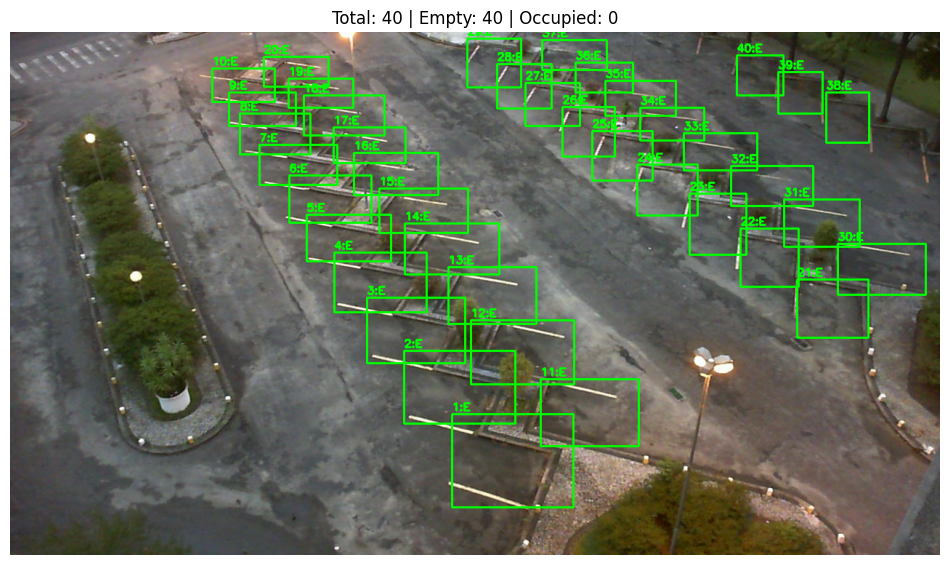

In [18]:
# Cell 12 — PKLot Inference With XML (PyTorch, Fully Fixed)

import cv2
import xml.etree.ElementTree as ET
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torchvision import models

# -----------------------------------------
# LOAD TRAINED MODEL
# -----------------------------------------

MODEL_PATH = MODELS_DIR / "best_model.pth"

# Load MobileNetV3-Small backbone
model = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.IMAGENET1K_V1)

# Replace classifier head for binary output
num_features = model.classifier[3].in_features
model.classifier[3] = nn.Linear(num_features, 1)

# Load your trained weights
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

print("✅ Loaded PyTorch model:", MODEL_PATH)


# -----------------------------------------
# XML Parsing — Extract slot bounding boxes
# -----------------------------------------

def parse_xml_slots(img_path, xml_path):
    img = cv2.imread(str(img_path))
    H, W = img.shape[:2]

    tree = ET.parse(xml_path)
    root = tree.getroot()

    slots = []

    for space in root.findall("space"):

        occ = space.get("occupied")
        if occ is None:
            continue

        occ = occ.strip().lower()
        true_label = 1 if occ in ["1", "true", "occupied"] else 0

        contour = space.find("contour")
        if contour is None:
            continue

        xs, ys = [], []
        for pt in contour.findall("point"):
            xs.append(int(pt.get("x")))
            ys.append(int(pt.get("y")))

        xmin, xmax = max(0, min(xs)), min(W - 1, max(xs))
        ymin, ymax = max(0, min(ys)), min(H - 1, max(ys))

        slots.append({
            "bbox": (xmin, ymin, xmax, ymax),
            "id": space.get("id"),
            "true_label": true_label
        })

    return img, slots


# -----------------------------------------
# Predict occupancy for each extracted slot
# -----------------------------------------

def predict_slot_status(img, slots, model, img_size=224):
    preds = []
    for s in slots:
        x1, y1, x2, y2 = s["bbox"]
        crop = img[y1:y2, x1:x2]

        if crop.size == 0:
            continue

        # Resize
        crop_resized = cv2.resize(crop, (img_size, img_size))

        # Convert to float32 + normalize
        crop_resized = crop_resized.astype(np.float32) / 255.0
        crop_resized = (crop_resized -
                        np.array([0.485, 0.456, 0.406], dtype=np.float32)) / \
                        np.array([0.229, 0.224, 0.225], dtype=np.float32)

        # Convert to tensor (C, H, W)
        crop_tensor = torch.tensor(crop_resized, dtype=torch.float32)
        crop_tensor = crop_tensor.permute(2, 0, 1).unsqueeze(0).to(device)

        # Run model
        with torch.no_grad():
            out = model(crop_tensor)
            prob = torch.sigmoid(out).item()
            pred = 1 if prob >= 0.5 else 0

        s["pred"] = pred
        s["prob"] = float(prob)
        preds.append(s)

    return preds


# -----------------------------------------
# Draw overlay on the full PKLot image
# -----------------------------------------

def draw_overlay(img, slots):
    overlay = img.copy()

    empty_count = 0
    occ_count = 0

    for s in slots:
        x1, y1, x2, y2 = s["bbox"]
        pred = s["pred"]

        if pred == 0:
            color = (0, 255, 0)
            empty_count += 1
        else:
            color = (0, 0, 255)
            occ_count += 1

        cv2.rectangle(overlay, (x1, y1), (x2, y2), color, 2)
        cv2.putText(overlay,
                    f"{s['id']}:{'E' if pred == 0 else 'O'}",
                    (x1, max(0, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    color,
                    2)

    total = empty_count + occ_count
    return overlay, total, empty_count, occ_count


# -----------------------------------------
# RUN INFERENCE ON RANDOM PKLot IMAGE
# -----------------------------------------

random_xml = random.choice(list(PKLOT_DIR.rglob("*.xml")))
random_img = random_xml.with_suffix(".jpg")

print("\n🔍 Random Image:", random_img)

img, slots = parse_xml_slots(random_img, random_xml)
slots = predict_slot_status(img, slots, model)

overlay, total, empty_count, occ_count = draw_overlay(img, slots)

overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(overlay_rgb)
plt.axis("off")
plt.title(f"Total: {total} | Empty: {empty_count} | Occupied: {occ_count}")
plt.show()
